## Anomaly detection 

### Exploratory data analysis

In [8]:
import pandas as pd

df = pd.read_csv('C../data/raw/03_corporate_transactions.csv')
print('This dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

This dataset has 15156 rows and 8 columns


In [2]:
df.head()

,FISCAL_YR,FISCAL_MTH,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESC,TRANS_DT,AMT
0,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2016,-5.50
1,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,18.31
2,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,21.61
3,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,22.39
4,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,5.44


In [3]:
df.columns

Index(['FISCAL_YR', 'FISCAL_MTH', 'DEPT_NAME', 'DIV_NAME', 'MERCHANT',
       'CAT_DESC', 'TRANS_DT', 'AMT'],
      dtype='object')

In [4]:
df.dtypes

FISCAL_YR       int64
FISCAL_MTH      int64
DEPT_NAME      object
DIV_NAME       object
MERCHANT       object
CAT_DESC       object
TRANS_DT       object
AMT           float64
dtype: object

In [5]:
# check for null values
print('Null values: \n', df.isnull().sum(), '\n')

# check for Nan values
print('Na values: \n', df.isna().sum(), '\n')

Null values: 
 FISCAL_YR     0
FISCAL_MTH    0
DEPT_NAME     0
DIV_NAME      0
MERCHANT      0
CAT_DESC      0
TRANS_DT      0
AMT           0
dtype: int64 

Na values: 
 FISCAL_YR     0
FISCAL_MTH    0
DEPT_NAME     0
DIV_NAME      0
MERCHANT      0
CAT_DESC      0
TRANS_DT      0
AMT           0
dtype: int64 



## visualisations

In [6]:
df['AMT'].describe()

count    15156.000000
mean       315.448271
std       1530.714012
min     -12849.300000
25%         16.090000
50%         48.990000
75%        264.162500
max      88501.320000
Name: AMT, dtype: float64

<Axes: xlabel='AMT', ylabel='Count'>

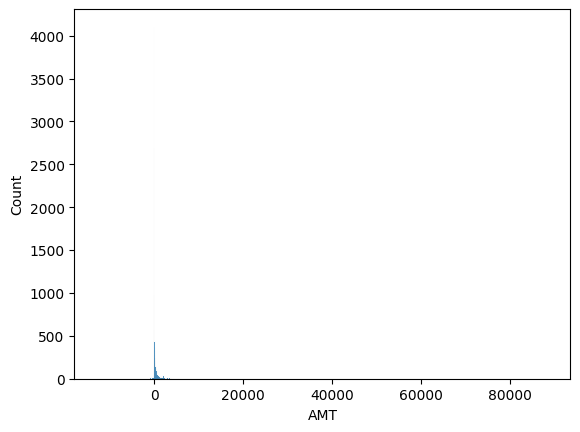

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='AMT')

<Axes: xlabel='AMT'>

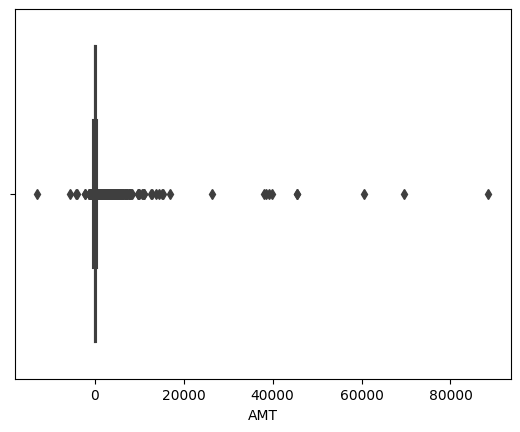

In [8]:
sns.boxplot(data=df, x='AMT')

> anomalies that are evident are negative amounts, and amounts that are more than 20,000 as it is uncommon and makes no sense logically, to spend negative or such large amounts of company funding in one month 

In [9]:
df[['FISCAL_YR', 'DEPT_NAME', 'DIV_NAME', 'MERCHANT', 'CAT_DESC']].nunique()

FISCAL_YR       6
DEPT_NAME       1
DIV_NAME       25
MERCHANT     5802
CAT_DESC      208
dtype: int64

> Department name is same for all rows, rendering the column irrelevant

1     1652
2     1171
3     1192
4     1802
5     1248
6     1062
7      817
8     1050
9     1211
10    1513
11    1417
12    1021
Name: FISCAL_MTH, dtype: int64


<Axes: xlabel='FISCAL_MTH', ylabel='count'>

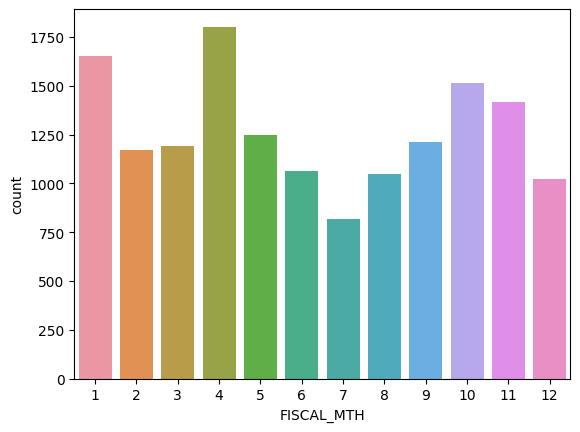

In [10]:
print(df['FISCAL_MTH'].value_counts().sort_index())
sns.countplot(data=df, x='FISCAL_MTH')

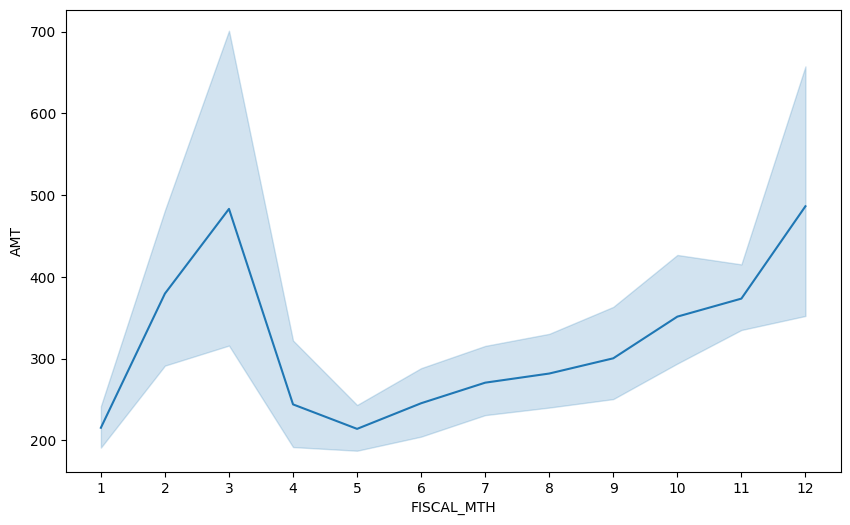

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='FISCAL_MTH', y='AMT')
ax.set_xticks(list(range(1,13)),list(range(1,13)))
plt.show()

> April has the most number of transactions, and July has the least number of transactions


> However, January has the lowest average amount spent, while March has the highest average amount spread with the largest spread.

2017    3558
2018    2381
2019    2840
2020    2249
2021    2766
2022    1362
Name: FISCAL_YR, dtype: int64


<Axes: xlabel='FISCAL_YR', ylabel='count'>

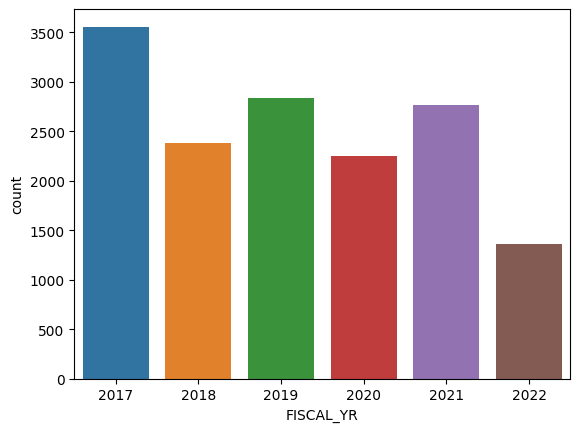

In [12]:
print(df['FISCAL_YR'].value_counts().sort_index())
sns.countplot(data=df, x='FISCAL_YR')

> There is an fluctuating decreasing trend over the years.

<Axes: xlabel='FISCAL_YR', ylabel='AMT'>

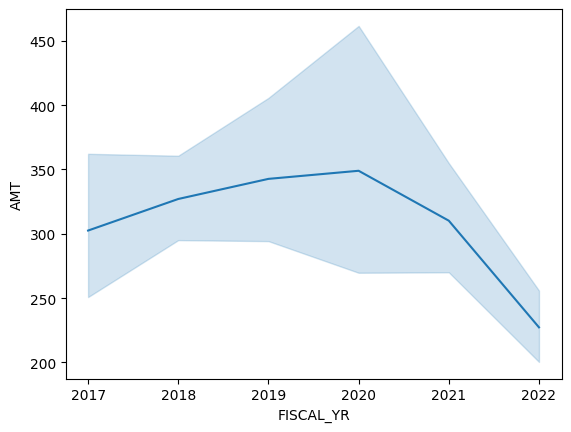

In [13]:
sns.lineplot(data=df, x='FISCAL_YR', y='AMT')

> 2020 had the highest spendings, and also the widest spread. 2022 has the lowest amount and smallest spread.

overall, the average spendings range between 250 to 350

Number of Divisions:  25


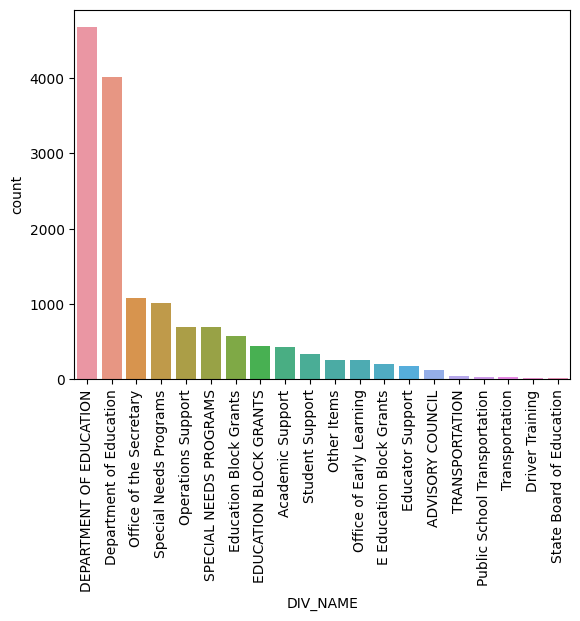

In [14]:
print('Number of Divisions: ', df.DIV_NAME.nunique())

# Limit number of categories shown
order = df["DIV_NAME"].value_counts().iloc[:20].index
sns.countplot(x="DIV_NAME", data=df, order=order)
plt.xticks(rotation=90)
plt.show()

> This countplot shows the top 20 divisions with highest number of entries. 
- The first 2 categories are the same, but one is capitalised. This is a potential data entry problem which can be overcome by capitalising data in all rows.

Number of Merchants:  5802


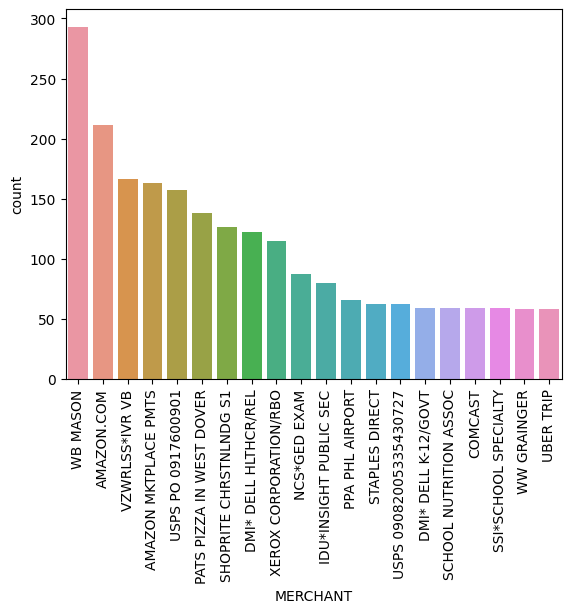

In [15]:
print('Number of Merchants: ', df.MERCHANT.nunique())

# Limit number of categories
order = df["MERCHANT"].value_counts().iloc[:20].index
sns.countplot(x="MERCHANT", data=df, order=order)
plt.xticks(rotation=90)
plt.show()

Number of Categories:  208


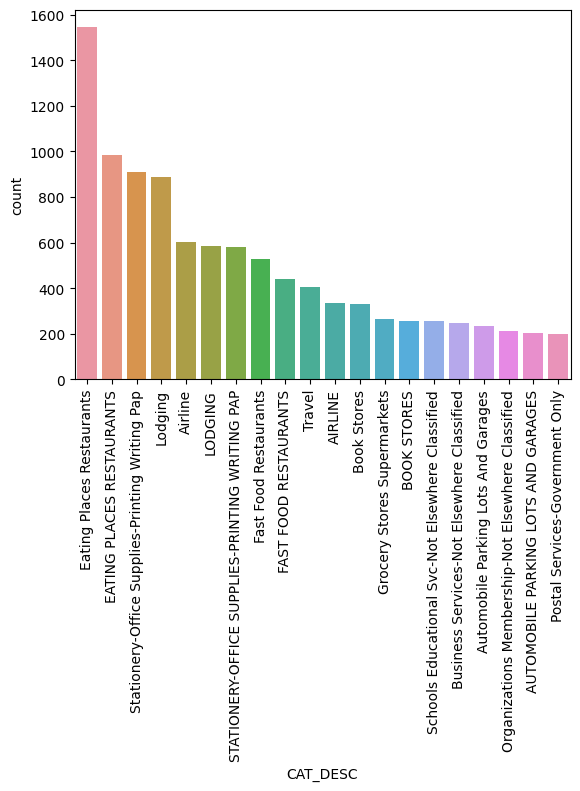

In [16]:
print('Number of Categories: ', df.CAT_DESC.nunique())

# Limit number of categories
order = df["CAT_DESC"].value_counts().iloc[:20].index
sns.countplot(x="CAT_DESC", data=df, order=order)
plt.xticks(rotation=90)
plt.show()

> similar to division name, some categories are repeated with different capitalisations

C:\Users\zowie\AppData\Local\Temp\ipykernel_19816\3268449492.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

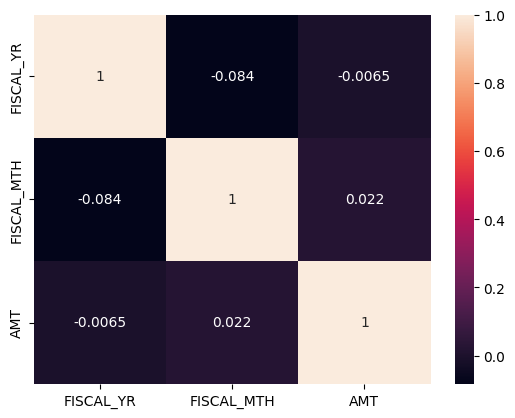

In [17]:
cor = df.corr()
sns.heatmap(data=cor, annot=True)